In [1]:
%matplotlib nbagg
import sys
sys.path.append(r'C:\Users\Bluefors\Dropbox (Moler group)\TeamBFLD\software\python\scanning-squid\scanning-squid')
import utils
import numpy as np
from microscope.susceptometer import SusceptometerMicroscope
import logging
import time

In [2]:
#Change log_name
config_file = 'config_susceptometer.json'
m = SusceptometerMicroscope(config_file, 'LT', log_name='TTG sample9')

INFO:2021-09-12_23:49:19:microscope:Logging started.
INFO:2021-09-12_23:49:19:microscope:Initializing microscope object using file config_susceptometer.json.


VisaIOError: VI_ERROR_RSRC_BUSY (-1073807246): The resource is valid, but VISA cannot currently access it.

In [ ]:
#Folder must have "config_measurements_susc.json"
log = logging.getLogger()
measurements = utils.load_json_ordered('config_measurements_susc.json')

In [ ]:
m.scanner.check_gate()

In [ ]:
m.ls372.A.temperature()

INFO:2021-09-12_19:54:51:microscope:Setting amplitude on SUSC_lockin to 0.1 V.
INFO:2021-09-12_19:54:51:microscope:Setting frequency on SUSC_lockin to 17.77 Hz.


<IPython.core.display.Javascript object>


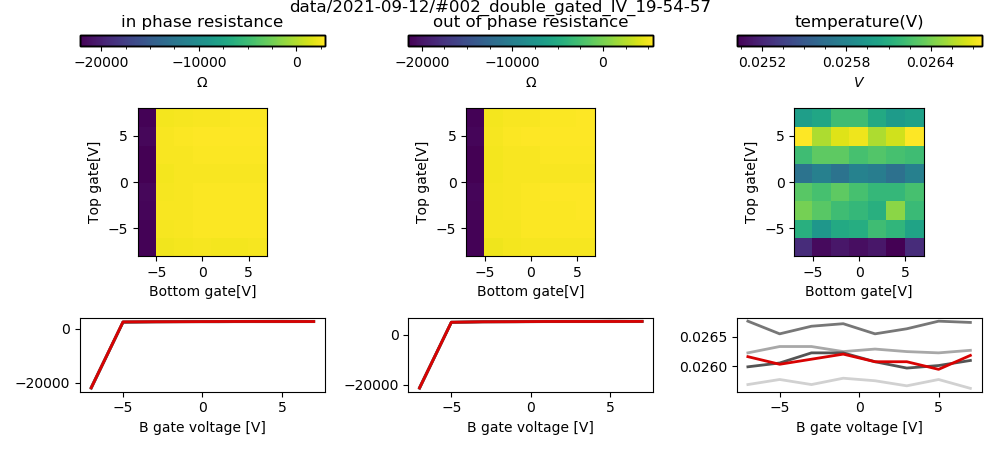

INFO:2021-09-12_19:54:57:microscope:Starting gating sample


Started at 2021-09-12 19:54:57


DataSet:
   location = 'data/2021-09-12/#002_double_gated_IV_19-54-57'
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | ke2410_volt_set | volt         | (9,)
   Measured | daq_ai_voltage  | voltage      | (9, 3, 8)
Finished at 2021-09-12 19:57:14


INFO:2021-09-12_19:57:17:scanner:Changed gate from 6.999 V to -0.001 V.


(DataSet:
    location = 'data/2021-09-12/#002_double_gated_IV_19-54-57'
    <Type>   | <array_id>      | <array.name> | <array.shape>
    Setpoint | ke2410_volt_set | volt         | (9,)
    Measured | daq_ai_voltage  | voltage      | (9, 3, 8),
 <plots.DoubleGatedPlot at 0x259c98bea90>)

In [4]:
m.double_gated_IV(measurements["double_gated_IV"])

In [ ]:
m.scanner.metadata['plane'].update({'x': 0})
m.scanner.metadata['plane'].update({'y': 0})
m.scanner.metadata['plane'].update({'z': 0})
m.scan_surface(measurements['scan'])

In [ ]:
#Folder must have "config_measurements_susc.json"
log = logging.getLogger()
measurements = utils.load_json_ordered('config_measurements_susc.json')

In [ ]:
m.ls340.A.temperature()

In [ ]:
m.ls340.heater_range(3)

In [ ]:
m.ls340.ramp_rate(5)

In [ ]:
m.ls340.set_temperature(0.2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
from scipy import io


ymd = dt.datetime.now().strftime('%Y-%m-%d')

my_folder = './data/' + ymd
F_C = '/FC_F-C_1283Hz'
newfolder = my_folder + F_C
if not os.path.exists(my_folder):
    os.makedirs(my_folder)


Units = {'LIA': 'V', 'IFC': 'V'}

m.SUSC_lockin.sensitivity(1)
maxamp = 0.451#[V]
dif = 0.05#[V]
amp = np.arange(0.05, maxamp, dif)#FC amp[V]
pts = int(maxamp/dif)
vol = []
amp2 = []

plt.ion()
fig=plt.figure()
plt.ylabel('Lock in amp [V]')
plt.xlabel('FC current amp [V]')
for i in range(0,pts):
    m.SUSC_lockin.amplitude(round(amp[i],3))
    time.sleep(1) 
    vol.append(m.SUSC_lockin.X())
    amp2.append(round(amp[i],3))
    data = {'LIA':vol, 'IFC':amp2, 'Units':Units}
    io.savemat(newfolder,data)
    plt.plot(amp2, vol,'ro')
    plt.title('LIA = {} V, IFC = {} V'.format(round(amp[i],3),m.SUSC_lockin.X()))
    plt.gcf().canvas.draw()
plt.show()
log.info('Saved data at {}'.format(newfolder))
m.SUSC_lockin.amplitude(0.05)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

ymd = dt.datetime.now().strftime('%Y-%m-%d')

my_folder = './data/' + ymd
F_C = '/FC_B-C_1283Hz'
newfolder = my_folder + F_C
if not os.path.exists(my_folder):
    os.makedirs(my_folder)


Units = {'LIA': 'V', 'IFC': 'V'}

m.SUSC_lockin.sensitivity(1)
maxamp = .41#[V]
dif = 0.05#[V]
amp = np.arange(0.05, maxamp, dif)#FC amp[V]
pts = int(maxamp/dif)
vol = []
amp2 = []

plt.ion()
fig=plt.figure()
plt.ylabel('Lock in amp [V]')
plt.xlabel('FC current amp [V]')
for i in range(0,pts):
    m.SUSC_lockin.amplitude(round(amp[i],3))
    time.sleep(1) 
    vol.append(m.SUSC_lockin.X())
    amp2.append(round(amp[i],3))
    data = {'LIA':vol, 'IFC':amp2, 'Units':Units}
    io.savemat(newfolder,data)
    plt.plot(amp2, vol,'bo')
    plt.title('LIA = {} V, IFC = {} V'.format(round(amp[i],3),m.SUSC_lockin.X()))
    plt.gcf().canvas.draw()
plt.show()
log.info('Saved data at {}'.format(newfolder))
m.SUSC_lockin.amplitude(0.05)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

ymd = dt.datetime.now().strftime('%Y-%m-%d')

my_folder = './data/' + ymd
F_C = '/FC_F-B_1283Hz'
newfolder = my_folder + F_C
if not os.path.exists(my_folder):
    os.makedirs(my_folder)

Units = {'LIA': 'V', 'IFC': 'V'}

m.SUSC_lockin.sensitivity(0.1)
maxamp = 2.51#[V]
dif = 0.05#[V]
amp = np.arange(0.05, maxamp, dif)#FC amp[V]
pts = int(maxamp/dif)
vol = []
amp2 = []

plt.ion()
fig=plt.figure()
plt.ylabel('Lock in amp [V]')
plt.xlabel('FC current amp [V]')
for i in range(0,pts):
    m.SUSC_lockin.amplitude(round(amp[i],3))
    time.sleep(1) 
    vol.append(m.SUSC_lockin.X())
    amp2.append(round(amp[i],3))
    data = {'LIA':vol, 'IFC':amp2, 'Units':Units}
    io.savemat(newfolder,data)
    plt.plot(amp2, vol,'go')
    plt.title('LIA = {} V, IFC = {} V'.format(round(amp[i],3),m.SUSC_lockin.X()))
    plt.gcf().canvas.draw()
plt.show()
log.info('Saved data at {}'.format(newfolder))
m.SUSC_lockin.amplitude(0.05)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

ymd = dt.datetime.now().strftime('%Y-%m-%d')

my_folder = './data/' + ymd
F_C = '/FC_B-C_1283Hz_2'
newfolder = my_folder + F_C
if not os.path.exists(my_folder):
    os.makedirs(my_folder)


Units = {'LIA': 'V', 'IFC': 'V'}

m.SUSC_lockin.sensitivity(1)
maxamp = .41#[V]
dif = 0.05#[V]
amp = np.arange(0.05, maxamp, dif)#FC amp[V]
pts = int(maxamp/dif)
vol = []
amp2 = []

plt.ion()
fig=plt.figure()
plt.ylabel('Lock in amp [V]')
plt.xlabel('FC current amp [V]')
for i in range(0,pts):
    m.SUSC_lockin.amplitude(round(amp[i],3))
    time.sleep(1) 
    vol.append(m.SUSC_lockin.X())
    amp2.append(round(amp[i],3))
    data = {'LIA':vol, 'IFC':amp2, 'Units':Units}
    io.savemat(newfolder,data)
    plt.plot(amp2, vol,'bo')
    plt.title('LIA = {} V, IFC = {} V'.format(round(amp[i],3),m.SUSC_lockin.X()))
    plt.gcf().canvas.draw()
plt.show()
log.info('Saved data at {}'.format(newfolder))
m.SUSC_lockin.amplitude(0.05)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

ymd = dt.datetime.now().strftime('%Y-%m-%d')

my_folder = './data/' + ymd
F_C = '/FC_F-B_1283Hz_2'
newfolder = my_folder + F_C
if not os.path.exists(my_folder):
    os.makedirs(my_folder)

Units = {'LIA': 'V', 'IFC': 'V'}

m.SUSC_lockin.sensitivity(0.1)
maxamp = 5.01#[V]
dif = 0.05#[V]
amp = np.arange(0.05, maxamp, dif)#FC amp[V]
pts = int(maxamp/dif)
vol = []
amp2 = []

plt.ion()
fig=plt.figure()
plt.ylabel('Lock in amp [V]')
plt.xlabel('FC current amp [V]')
for i in range(0,pts):
    m.SUSC_lockin.amplitude(round(amp[i],3))
    time.sleep(1) 
    vol.append(m.SUSC_lockin.X())
    amp2.append(round(amp[i],3))
    data = {'LIA':vol, 'IFC':amp2, 'Units':Units}
    io.savemat(newfolder,data)
    plt.plot(amp2, vol,'go')
    plt.title('LIA = {} V, IFC = {} V'.format(round(amp[i],3),m.SUSC_lockin.X()))
    plt.gcf().canvas.draw()
plt.show()
log.info('Saved data at {}'.format(newfolder))
m.SUSC_lockin.amplitude(0.05)


In [ ]:
# characterize noise before approaching
prefactors = m.get_prefactors(measurements['scan'])
from scripts import fft_noise
data = fft_noise('Dev2',#dev_name
                 {'MAG': 0},#channel
                 'mPhi0',#unit
                 prefactors['MAG'],#prefactor
                 1e6,#samplerate
                 1,#sampledulation
                 10,#navg
                 30000)#fmax
log.info('Finished fft_noise at T={} K at bender {}'.format(m.ls340.A.temperature(),m.scanner.position()))

In [ ]:
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
# try a different lock point
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
time.sleep(5)
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
m.approach(measurements['td_cap'], attosteps=100)

In [ ]:
#balanced cap again 
time.sleep(5)
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
m.approach(measurements['td_cap'], attosteps=100)

In [ ]:
#balanced cap again 
time.sleep(5)
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
m.approach(measurements['td_cap'], attosteps=100)

In [ ]:
# try a different cap frequency and do again
time.sleep(5)
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
m.approach(measurements['td_cap'], attosteps=100)

In [ ]:
# changed cap lockin output from 1V to .7V
time.sleep(5)
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
m.approach(measurements['td_cap'], attosteps=100)

In [ ]:
m.atto.step('z',-20)

In [ ]:
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
m.get_surface([-4,0,4], [-4,0,4], measurements["td_cap"])

In [ ]:
m.get_surface([-2,0,2], [-2,0,2], measurements["td_cap"])

In [ ]:
m.get_surface([0,2,4], [-4,-2,0], measurements["td_cap"])

In [ ]:
measurements = utils.load_json_ordered('config_measurements_susc.json')
m.scan_surface(measurements['scan'])

In [ ]:
# agenda for tomorror
# make TDs more gentle
# move in -y direction to avoid bump
# or scan at over Tc to see if mag is filled with vortices

In [ ]:
#            "max_slope": "1fF/V",
#            "max_delta_cap": "4 fF",
#            "initial_cap":"0 pF",
#            "nfitmin":50,
#            "nwindow":100,
#            "ntest":10,
#            "wait_factor":2

m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
#Check if the Lock-in-Amp for SUSCX is not saturated?
m.scanner.goto([0,0,3.7])

In [ ]:
#SUSCX is -14mV at touchdown, sensitivity is 20 mV

In [ ]:
m.scanner.goto([0,0,-10])

In [ ]:
#            "max_slope": "2fF/V",
#            "max_delta_cap": "4 fF",
#            "initial_cap":"0 pF",
#            "nfitmin":20,
#            "nwindow":40,
#            "ntest":10,
#            "wait_factor":2
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
#            "max_slope": "1.5fF/V",
#            "max_delta_cap": "4 fF",
#            "initial_cap":"0 pF",
#            "nfitmin":15,
#            "nwindow":50,
#            "ntest":10,
#            "wait_factor":2
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
#            "max_slope": "1.5fF/V",
#            "max_delta_cap": "4 fF",
#            "initial_cap":"0 pF",
#            "nfitmin":10,
#            "nwindow":30,
#            "ntest":8,
#            "wait_factor":2
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
#            "max_slope": "1.5fF/V",
#            "max_delta_cap": "4 fF",
#            "initial_cap":"0 pF",
#            "nfitmin":15,
#            "nwindow":30,
#            "ntest":8,
#            "wait_factor":2
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
#real touchdown?
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
#            "max_slope": "1.5fF/V",
#            "max_delta_cap": "4 fF",
#            "initial_cap":"0 pF",
#            "nfitmin":15,
#            "nwindow":50,
#            "ntest":10,
#            "wait_factor":2
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
#            "max_slope": "1.5fF/V",
#            "max_delta_cap": "4 fF",
#            "initial_cap":"0 pF",
#            "nfitmin":15,
#            "nwindow":50,
#            "ntest":10,
#            "wait_factor":2
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.03)
m.CAP_lockin.time_constant(0.03)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
# CAP noise
prefactors = m.get_prefactors(measurements['scan'])
from scripts import fft_noise
data = fft_noise('Dev2',#dev_name
                 {'CAP': 3},#channel
                 'fF',#unit
                 prefactors['CAP'],#prefactor
                 1e6,#samplerate
                 1,#sampledulation
                 10,#navg
                 30000)#fmax
log.info('Finished fft_noise at T={} K at bender {}'.format(m.ls340.A.temperature(),m.scanner.position()))

In [ ]:
#change the BNC cable's positions for CAP

#            "max_slope": "1.5fF/V",
#            "max_delta_cap": "4 fF",
#            "initial_cap":"0 pF",
#            "nfitmin":15,
#            "nwindow":50,
#            "ntest":10,
#            "wait_factor":2
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
# CAP noise decreased?
prefactors = m.get_prefactors(measurements['scan'])
from scripts import fft_noise
data = fft_noise('Dev2',#dev_name
                 {'CAP': 3},#channel
                 'fF',#unit
                 prefactors['CAP'],#prefactor
                 1e6,#samplerate
                 1,#sampledulation
                 10,#navg
                 30000)#fmax
log.info('Finished fft_noise at T={} K at bender {}'.format(m.ls340.A.temperature(),m.scanner.position()))

In [ ]:
#            "max_slope": "1.5fF/V",
#            "max_delta_cap": "4 fF",
#            "initial_cap":"0 pF",
#            "nfitmin":15,
#            "nwindow":30,
#            "ntest":8,
#            "wait_factor":2
m.scanner.goto([0,0,-10])
m.SUSC_lockin.time_constant(0.01)
m.CAP_lockin.time_constant(0.01)
measurements = utils.load_json_ordered('config_measurements_susc.json')
_ = m.td_cap(measurements["td_cap"])

In [ ]:
m.ls340.set_temperature(8)

In [ ]:
measurements = utils.load_json_ordered('config_measurements_susc.json')
m.scan_surface(measurements['scan'])

In [ ]:
m.ls340.set_temperature(10)

In [ ]:
m.get_surface([0,2,4], [-4,-2,0], measurements["td_cap"])

In [ ]:
measurements = utils.load_json_ordered('config_measurements_susc.json')
m.scan_surface(measurements['scan'])